### PIL(Pillow)를 이용한 이미지 처리 
- pip install Pillow 

In [61]:
from PIL import Image

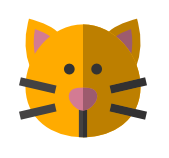

In [62]:
# 이미지 불러오기
cat = Image.open("/kaggle/input/data-cat/cat.png")
cat

In [63]:
# Image 층 가져오기
cat.getbands()

('R', 'G', 'B')

### Modes
- L : black and white
- RGB : true color
- RGBA : true color with 투명도
- YCbCr : color video format

In [64]:
# mode 확인
cat.mode

'RGB'

In [65]:
# size
cat.size

(169, 158)

In [66]:
# File name
cat.filename

'/kaggle/input/data-cat/cat.png'

In [67]:
# file format
cat.format

'PNG'

In [68]:
# Data Directory 생성하기
import os
os.mkdir("Data")

FileExistsError: [Errno 17] File exists: 'Data'

In [ ]:
# Covert to JPEG 
cat.save("/kaggle/working/Data/cat1.jpg")

### Image Resize

In [99]:
158 / 2

79.0

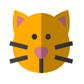

In [100]:
cat_resize = cat.resize((84, 84))
cat_resize

----
### Thumbnail 만들기
- 가로와 세로 크기를 반으로 줄인다.
- 반으로 줄이면 실수(Real Number)가 발생할 수 있어 truncate 한다.

In [101]:
import math

In [102]:
math.trunc(cat.size[0] / 2)

84

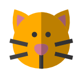

In [103]:
# thumbnail 만들기
size = (math.trunc(cat.size[0]/2), math.trunc(cat.size[1]/2))
catThumb = cat.copy()
catThumb.thumbnail(size)
catThumb

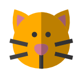

In [104]:
cat_resize = cat.resize(size)
cat_resize

---
#### Image Manipulation

#### Image Crop

In [105]:
# 이미지 크기
print("전체크기:", cat.size)
print("가로크기:", cat.width)
print("세로크기:", cat.height)

전체크기: (169, 158)
가로크기: 169
세로크기: 158


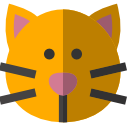

In [106]:
box = (20, 15, 147, 140) # Crop 범위 : (x좌표, y좌표, x크기, y크기 )
catCrop = cat.crop(box)
catCrop

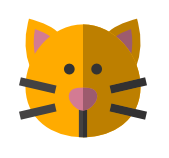

In [107]:
cat

### Image Rotate

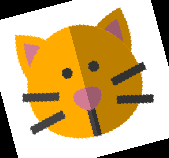

In [108]:
catRotate = cat.rotate(15)
catRotate

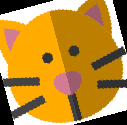

In [109]:
catCrop.rotate(15)

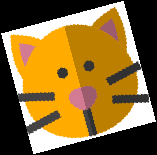

In [110]:
catCrop.rotate(15, expand=True)

---
### Image Merge

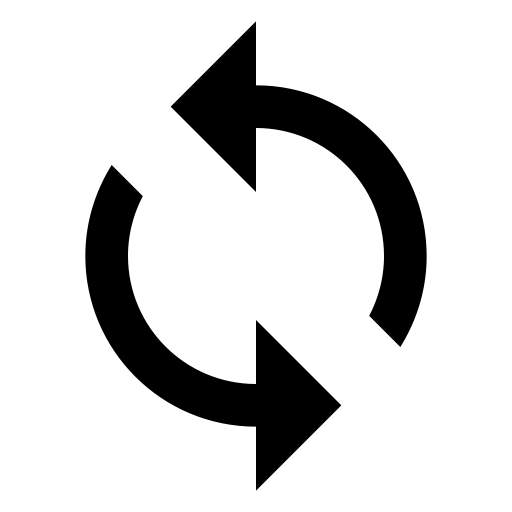

In [111]:
record = Image.open("/kaggle/input/data-record/record.png")
record

In [112]:
# Mode
record.mode

'RGBA'

In [113]:
# 크기
record.size

(512, 512)

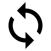

In [114]:
# 이미지의 크기가 cat보다 커서 줄이자 (1/10)
size = (math.trunc(record.size[0]/10), math.trunc(record.size[1]/10))
recordThumb = record.copy()
recordThumb.thumbnail(size)
recordThumb

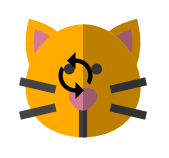

In [115]:
# cat 이미지 위에 recordThumb 배치 
position = (50, 50)
catMerge = cat.copy()
catMerge.paste(recordThumb, position, recordThumb)
catMerge

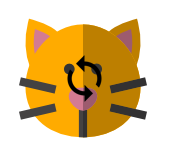

In [116]:
# Center에 배치 
position = (math.trunc((cat.width - recordThumb.width)/2), math.trunc((cat.height - recordThumb.height)/2))
catMerge = cat.copy()
catMerge.paste(recordThumb, position, recordThumb)
catMerge

### Image Flip

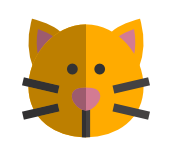

In [117]:
catFlip = cat.copy()
catFlip.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

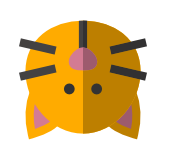

In [118]:
catFlip = cat.copy()
catFlip.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

### PIL image to Numpy array

In [119]:
import numpy as np

In [120]:
cat_array = np.array(cat)
cat_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

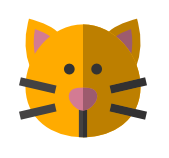

In [121]:
# array를 image로 변환
img = Image.fromarray(cat_array, 'RGB')
img.save("./Data/cat_array.png")
img

In [122]:
# 특정 Pixel의 RGB
cat_50_50 = cat.getpixel((50,50))
cat_50_50

(255, 171, 0)

### Color Transformation

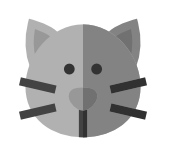

In [123]:
# Gray Scale로 변환 
cat.convert('L')

### Image Enhancement

In [124]:
from PIL import ImageEnhance

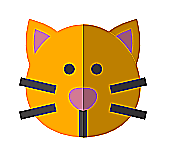

In [125]:
# image Sharpness
enhancer = ImageEnhance.Sharpness(cat)
enhancer.enhance(10.0)

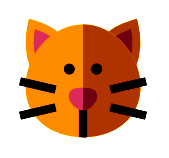

In [126]:
# image contrast
enhancer = ImageEnhance.Contrast(cat)
enhancer.enhance(2)

### Filters

In [127]:
from PIL import ImageFilter

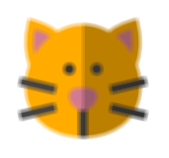

In [128]:
# Blur
cat.filter(ImageFilter.BLUR)

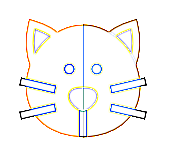

In [129]:
# Contour
cat.filter(ImageFilter.CONTOUR)

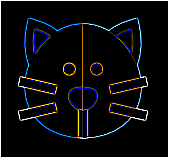

In [130]:
cat.filter(ImageFilter.FIND_EDGES)

---
### Animated GIF 분리하기

In [131]:
from PIL import ImageSequence

In [132]:
switch = Image.open("/kaggle/input/data-switch/switch.gif")

In [134]:
# Directory 만들기
os.mkdir("./Data/switch")

In [136]:
frame_num = 1
for frame in ImageSequence.Iterator(switch):
    frame.save(f"./Data/switch/switch_{frame_num:02d}.png")
    frame_num+=1
    if frame_num == 13:
        break